# 1. Importing & Loading Packages

In [201]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from scipy.stats import t

In [202]:
train = pd.read_csv('/Users/KATMER/Desktop/github/train.csv')

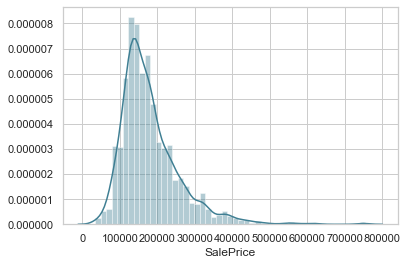

In [203]:
#histogram
sns.distplot(train['SalePrice'])

Now that I have got a general idea about my data set, it’s also a good idea to take a closer look at the data itself. With the help of the head() and tail() functions of the Pandas library, I can easily check out the first and last lines of your DataFrame, respectively.
Let take a look at some sample data. 
The outcome variable SalePrice is a complete variable, but there are a number of predictors with many missing values. It looks like we will need to deal with quite a few missing values. 

In [204]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [205]:
train.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [206]:
train.shape

(1460, 81)

In [207]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

I will look at different datatypes now.

In [208]:
train.dtypes.value_counts()

object     43
int64      35
float64     3
dtype: int64

## Summarizing the Data
Describe gives statistical information about numerical columns in the dataset.
I will briefly look at the dataset to get familiar with the features, missing values and anything strange in general.
Median house price is $163,000.

In [209]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# 2. Correlation in Data

In [210]:
corr=train.corr()["SalePrice"]
corr[np.argsort(corr, axis=0)[::-1]]

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

9 most relevant variables with SalePrice that have more than 0.5 correlation with SalePrice.

    OverallQual : Overall material and finish quality
    GrLivArea : Above grade (ground : the portion of a home that is above the ground) living area square feet
    GarageCars : Size of garage in car capacity
    GarageArea : Size of garage in square feet
    TotalBsmtSF : Total square feet of basement area
    1stFlrSF : First Floor square feet
    FullBath : Full bathrooms above grade
    TotRmsAbvGrd : Total rooms above grade (does not include bathrooms)
    YearBuilt : Original construction date

These can prove to be important features to predict SalePrice.

# 3. Visualization

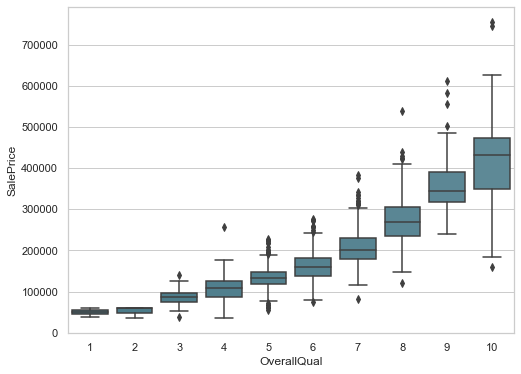

In [211]:
data = pd.concat([train['SalePrice'], train['OverallQual']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='OverallQual', y="SalePrice", data=data)

In [212]:
train.drop(train[train.SalePrice > 200000] & train[train.OverallQual == 4].index, inplace=True)
train.reset_index(drop=True, inplace=True)

ValueError: Unable to coerce to Series, length must be 81: given 116

The higher the quality, the better the selling price.

In [ ]:
data = pd.concat([train['SalePrice'], train['GrLivArea']], axis=1)
_ = plt.subplots(figsize=(8, 6))
fig = sns.regplot(x='GrLivArea', y="SalePrice", data=data)

The relationship between GrLivArea and SalePrice has a positive correlation. That is, as the area becomes wider, the price also increases.

In [ ]:
data = pd.concat([train['SalePrice'], train['GarageCars']], axis=1)
_ = plt.subplots(figsize=(8, 6))
_ = sns.boxplot(x='GarageCars', y="SalePrice", data=data)

In [ ]:
data = pd.concat([train['SalePrice'], train['GarageArea']], axis=1)
_ = plt.subplots(figsize=(8, 6))
_ = sns.regplot(x='GarageArea', y="SalePrice", data=data)

GarageArea is divided into zero and non-zero parts.
Generally, there is a positive correlation.

In [ ]:
data = pd.concat([train['SalePrice'], train['TotalBsmtSF']], axis=1)
_ = plt.subplots(figsize=(8, 6))
_ = sns.regplot(x='TotalBsmtSF', y="SalePrice", data=data)

In [ ]:
data = pd.concat([train['SalePrice'], train['1stFlrSF']], axis=1)
_ = plt.subplots(figsize=(8, 6))
_ = sns.regplot(x='1stFlrSF', y="SalePrice", data=data)

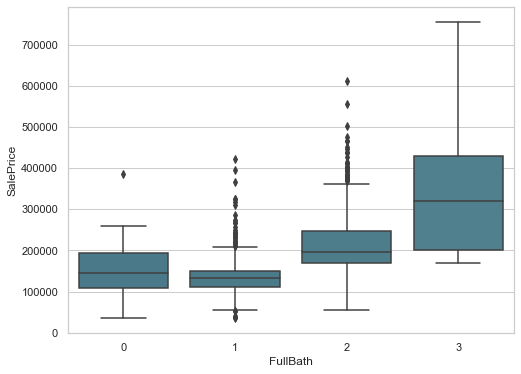

In [213]:
data = pd.concat([train['SalePrice'], train['FullBath']], axis=1)
_ = plt.subplots(figsize=(8, 6))
_ = sns.boxplot(x='FullBath', y="SalePrice", data=data)

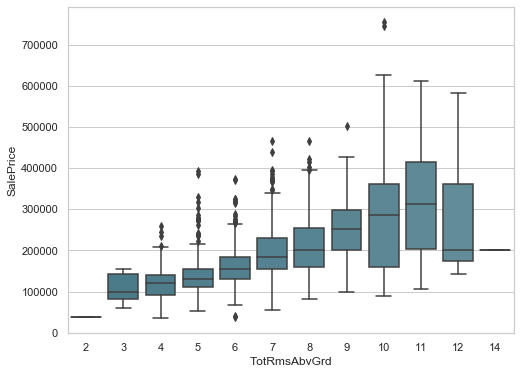

In [214]:
data = pd.concat([train['SalePrice'], train['TotRmsAbvGrd']], axis=1)
_ = plt.subplots(figsize=(8, 6))
_ = sns.boxplot(x='TotRmsAbvGrd', y="SalePrice", data=data)

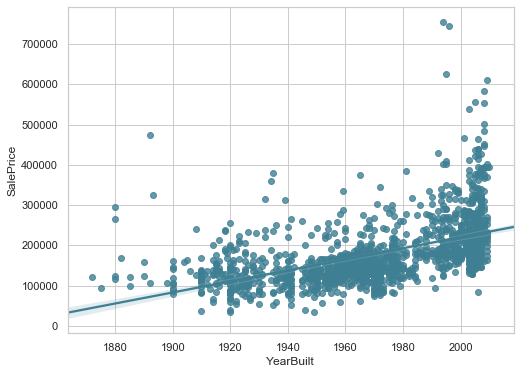

In [215]:
data = pd.concat([train['SalePrice'], train['YearBuilt']], axis=1)
_ = plt.subplots(figsize=(8, 6))
_ = sns.regplot(x='YearBuilt', y="SalePrice", data=data)

# 4. Finding Missing Values

Text(0.5, 1.0, 'Total Missing Value (%)')

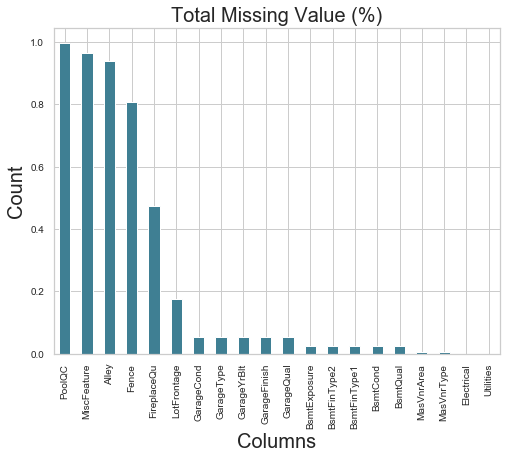

In [216]:
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

percent_data = percent.head(20)
percent_data.plot(kind="bar", figsize = (8,6), fontsize = 10)
plt.xlabel("Columns", fontsize = 20)
plt.ylabel("Count", fontsize = 20)
plt.title("Total Missing Value (%)", fontsize = 20)
#histogram
#missing_data = missing_data.head(20)

    1. Why was there a missing vales?
    2. How should I handle missing values?

In [217]:
train.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


## PoolQC, MiscFeature, Alley, Fence

    Here null values means, NA means the house does not have PoolQC, MiscFeature, Alley, and Fence.
    Simply NA is a one type of category so,filled as 'NA'.belows categories of Alley Columns

In [218]:
#Filling with "NA" string
for col in ['Alley','FireplaceQu','Fence','MiscFeature','PoolQC']:
    train[col].fillna('NA', inplace=True)

## LotFrontage: Linear feet of street connected to property

In [219]:
train[train['LotFrontage'].isnull()].head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
7,8,60,RL,NaN,10382,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,Shed,350,11,2009,WD,Normal,200000
12,13,20,RL,NaN,12968,Pave,NA,IR2,Lvl,AllPub,...,0,NA,NA,NA,0,9,2008,WD,Normal,144000
14,15,20,RL,NaN,10920,Pave,NA,IR1,Lvl,AllPub,...,0,NA,GdWo,NA,0,5,2008,WD,Normal,157000
16,17,20,RL,NaN,11241,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,Shed,700,3,2010,WD,Normal,149000
24,25,20,RL,NaN,8246,Pave,NA,IR1,Lvl,AllPub,...,0,NA,MnPrv,NA,0,5,2010,WD,Normal,154000
31,32,20,RL,NaN,8544,Pave,NA,IR1,Lvl,AllPub,...,0,NA,MnPrv,NA,0,6,2008,WD,Normal,149350
42,43,85,RL,NaN,9180,Pave,NA,IR1,Lvl,AllPub,...,0,NA,MnPrv,NA,0,12,2007,WD,Normal,144000
43,44,20,RL,NaN,9200,Pave,NA,IR1,Lvl,AllPub,...,0,NA,MnPrv,NA,0,7,2008,WD,Normal,130250
50,51,60,RL,NaN,13869,Pave,NA,IR2,Lvl,AllPub,...,0,NA,NA,NA,0,7,2007,WD,Normal,177000
64,65,60,RL,NaN,9375,Pave,NA,Reg,Lvl,AllPub,...,0,NA,GdPrv,NA,0,2,2009,WD,Normal,219500


This column is categorical columns but it has numerical values. So, I'm going to fill this values with most frequent value of the column, below code return most frequent value.

In [220]:
train["LotFrontage"].value_counts().to_frame().index[0]

60.0

In [221]:
train['LotFrontage'].value_counts()

60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
106.0      1
38.0       1
138.0      1
140.0      1
137.0      1
Name: LotFrontage, Length: 110, dtype: int64

In [222]:
train['LotFrontage'].fillna(train["LotFrontage"].value_counts().to_frame().index[0], inplace=True)

## In below columns, null value means there is no Garage, because these columns has same no of missing values and with same rows.so ican say that null values means No Garage.

    GarageType: Garage location
    GarageFinish: Interior finish of the garage
    GarageQual: Garage quality
    GarageCond: Garage condition
    GarageYrBlt: Year garage was built (if there is no garage then not possible build year so , filling with NA)

In [223]:
train[['GarageQual','GarageFinish','GarageYrBlt','GarageType','GarageCond']].isna().head(7)

,GarageQual,GarageFinish,GarageYrBlt,GarageType,GarageCond
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
5,False,False,False,False,False
6,False,False,False,False,False


In [224]:
for col in ['GarageQual','GarageFinish','GarageYrBlt','GarageType','GarageCond']:
    train[col].fillna('NA',inplace=True)

## For belows columns applying same strategy of Garage, null values means No Basement.

    BsmtQual: Evaluates the height of the basement
    BsmtCond: Evaluates the general condition of the basement
    BsmtExposure: Refers to walkout or garden level walls
    BsmtFinType1: Rating of basement finished area
    BsmtFinType2: Rating of basement finished area (if multiple types)
    

In [225]:
for col in ['BsmtQual','BsmtCond','BsmtFinType1','BsmtFinType2','BsmtExposure']:
    train[col].fillna('NA',inplace=True)

## Electrical: Electrical system
    SBrkr    Standard Circuit Breakers & Romex
    FuseA    Fuse Box over 60 AMP and all Romex wiring (Average) 
    FuseF    60 AMP Fuse Box and mostly Romex wiring (Fair)
    FuseP    60 AMP Fuse Box and mostly knob & tube wiring (poor)
    Mix  Mixed
    
## in this column, maximum value has 'SBrkr' category.so simply fillna with 'SBrkr'.

In [226]:
train['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [227]:
train['Electrical'].fillna('SBrkr',inplace=True)

Belows bunch of columns has 1,2,4 missing values.so i'm going to use same strategy for all columns.

In [228]:
missings = ['GarageCars','GarageArea','KitchenQual','Exterior1st','SaleType','TotalBsmtSF','BsmtUnfSF','Exterior2nd',
            'BsmtFinSF1','BsmtFinSF2','BsmtFullBath','Functional','Utilities','BsmtHalfBath','MSZoning']
train[missings].head()

,GarageCars,GarageArea,KitchenQual,Exterior1st,SaleType,TotalBsmtSF,BsmtUnfSF,Exterior2nd,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,Functional,Utilities,BsmtHalfBath,MSZoning
0,2,548,Gd,VinylSd,WD,856,150,VinylSd,706,0,1,Typ,AllPub,0,RL
1,2,460,TA,MetalSd,WD,1262,284,MetalSd,978,0,0,Typ,AllPub,1,RL
2,2,608,Gd,VinylSd,WD,920,434,VinylSd,486,0,1,Typ,AllPub,0,RL
3,3,642,Gd,Wd Sdng,WD,756,540,Wd Shng,216,0,1,Typ,AllPub,0,RL
4,3,836,Gd,VinylSd,WD,1145,490,VinylSd,655,0,1,Typ,AllPub,0,RL


Dereferencing numerical and categorical columns.

In [229]:
numerical=['GarageCars','GarageArea','TotalBsmtSF','BsmtUnfSF','BsmtFinSF1','BsmtFinSF2','BsmtFullBath','BsmtHalfBath']
categorical = ['KitchenQual','Exterior1st','SaleType','Exterior2nd','Functional','Utilities','MSZoning']

for numerical columns filling NaN as median value.

In [230]:
for col in ['GarageCars','GarageArea','TotalBsmtSF','BsmtUnfSF','BsmtFinSF1','BsmtFinSF2','BsmtFullBath','BsmtHalfBath']:
    train[col].fillna(train.median(),inplace=True)

for categorical columns filling NaN with most frequent value of the column.

In [231]:
for i in categorical:
    train[i].fillna(train[i].value_counts().to_frame().index[0], inplace=True)

## MasVnrArea: Masonry veneer area in sf. For this column filling NaN with median value if 'saleprice' which 'masVnrType' in 'BrkFace' category. 
     BrkCmn   Brick Common
     BrkFace  Brick Face
     CBlock   Cinder Block
     None     None
     Stone    Stone

In [232]:
train[train['MasVnrType'].isna()][['SalePrice','MasVnrType','MasVnrArea']]

,SalePrice,MasVnrType,MasVnrArea
234,216500,NaN,NaN
529,200624,NaN,NaN
650,205950,NaN,NaN
936,184900,NaN,NaN
973,182000,NaN,NaN
977,199900,NaN,NaN
1243,465000,NaN,NaN
1278,237000,NaN,NaN


In [233]:
print(train[train['MasVnrType']=='None']['SalePrice'].median())
print(train[train['MasVnrType']=='BrkFace']['SalePrice'].median())
print(train[train['MasVnrType']=='Stone']['SalePrice'].median())
print(train[train['MasVnrType']=='BrkCmn']['SalePrice'].median())

143000.0
181000.0
246839.0
139000.0


In [234]:
train['MasVnrArea'].fillna(181000,inplace=True)
train['MasVnrType'].fillna('NA',inplace=True)

There is no missing values.

In [235]:
print(train.isna().sum().sort_values()[-5:-1])

Exterior1st    0
RoofMatl       0
RoofStyle      0
Heating        0
dtype: int64


In [236]:
train.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

In [237]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non

## Inferential Statistics

Import Packages

In [251]:
from sklearn import preprocessing

sns.set()
sns.set_style("whitegrid")
palette = sns.diverging_palette(220, 20, sep = 20, n = 150)
sns.set_palette(palette)

Prepare functions for Plotting

In [253]:
def get_sub_plot(width = 20, height = 10, label_font_size = 14, tick_font_size = 13):
    fig, ax = plt.subplots()
    fig.set_size_inches(width, height)
    ax.tick_params(labelsize = tick_font_size)
    ax.set_xlabel(ax.get_xlabel(), fontsize = label_font_size)
    ax.set_ylabel(ax.get_ylabel(), fontsize = label_font_size)
    return ax

def plot_joint_plot(x, y, df):
    #ax = get_sub_plot()
    sns.jointplot(x = x, y = y, data = df, kind = 'reg')
    plt.show()
    
def plot_box_plot(x, y, data):
    ax = get_sub_plot()
    sns.boxplot(x = x, y = y, data = df, ax = ax)
    plt.show()

## Question 1: Are there variables that are particularly significant in terms of predicting SalePrices?
Assuming SalePrice is proportional to OverallQual, GrLivArea, GarageCars, GarageArea, and TotalBsmtSF. Let's verify.

In [257]:
from scipy import stats

def report_pearson(x, y, data):
    correlation, p = stats.pearsonr(train[x], train[y])
    print('{:10s} {:10.2f} {:10.2f}'.format('pearson', correlation, p))

def report_numerical_x_vs_numerical_y(variables, y, train):
    for var in variables:
        print(var + ':')
        report_pearson(var, y, train)
        plot_joint_plot(var, y, train)

In [258]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

OverallQual:
pearson          0.79       0.00


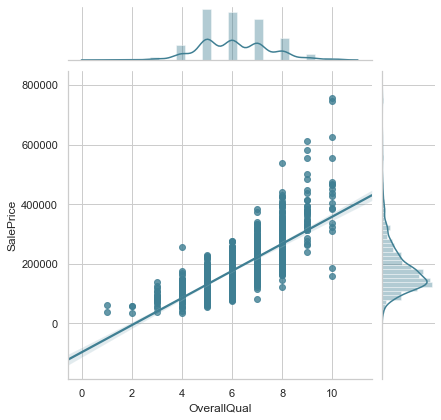

GrLivArea:
pearson          0.71       0.00


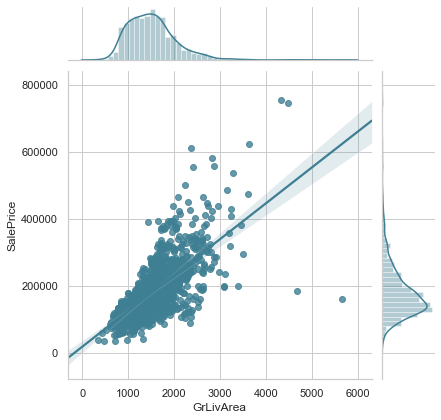

GarageCars:
pearson          0.64       0.00


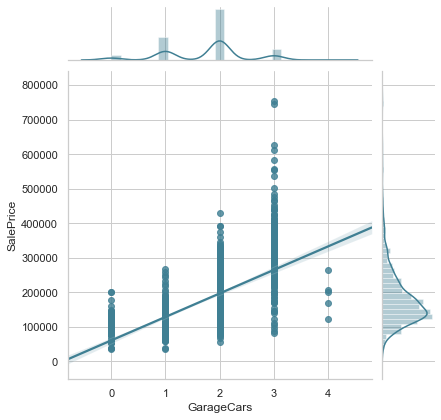

GarageArea:
pearson          0.62       0.00


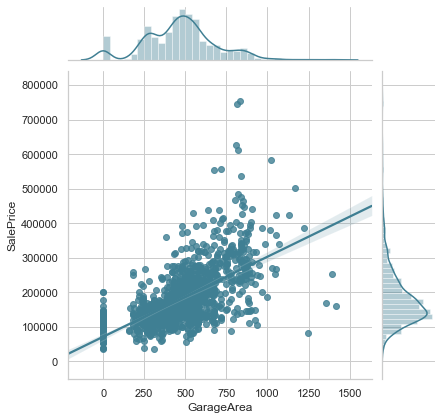

TotalBsmtSF:
pearson          0.61       0.00


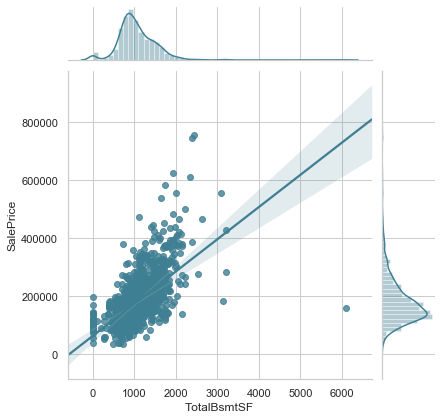

In [262]:
y = 'SalePrice'
variables = ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF']

report_numerical_x_vs_numerical_y(variables, y, train)

In [ ]:
As we expected, OverallQual, GrLivArea, GarageCars, GarageArea, TotalBsmtSF all have pearson's correlation coefficient > 0.5, which correlate well with listing price.

## Question 2: Are there strong correlations between pairs of independent variables?

We have the following independent variables: OverallQual, GrLivArea, GarageCars, GarageArea, TotalBsmtSF.
Let's check the correlation between them:
1. OverallQual & GrLivArea
2. OverallQual & GarageCars.
3. OverallQual & GarageArea.
4. OverallQual & TotalBsmtSF.

OverallQual:
pearson          0.59       0.00


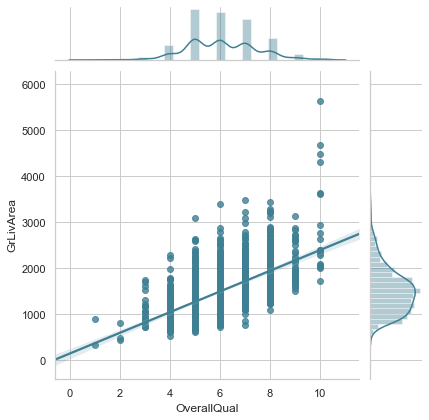

In [263]:
report_numerical_x_vs_numerical_y(['OverallQual'], 'GrLivArea', train)

OverallQual:
pearson          0.60       0.00


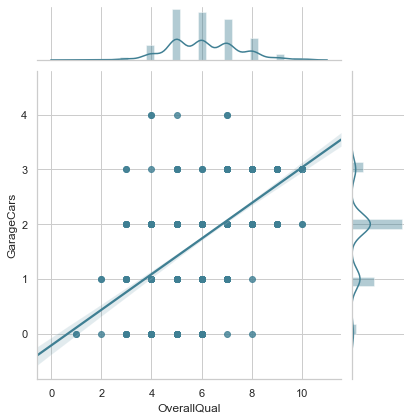

In [264]:
report_numerical_x_vs_numerical_y(['OverallQual'], 'GarageCars', train)

OverallQual:
pearson          0.56       0.00


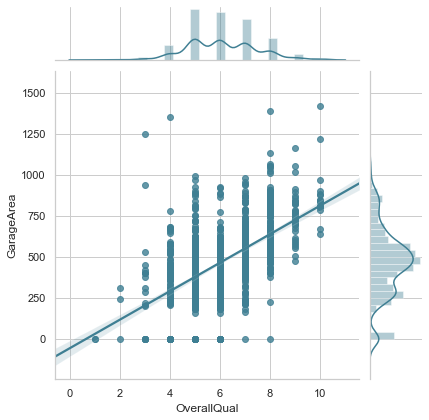

In [265]:
report_numerical_x_vs_numerical_y(['OverallQual'], 'GarageArea', train)

OverallQual:
pearson          0.54       0.00


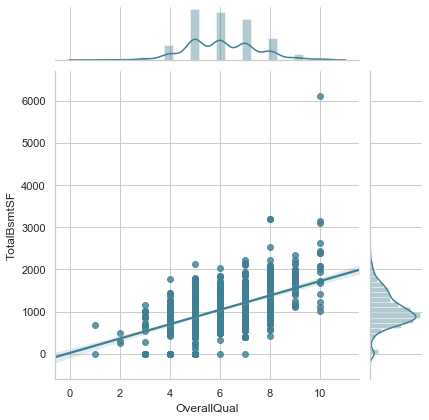

In [266]:
report_numerical_x_vs_numerical_y(['OverallQual'], 'TotalBsmtSF', train)

## Question 3: Are there strong correlation between an independent and a dependent variable?

As we expected, independent variables, like OverallQual, GrLivArea, GarageCars, GarageArea,and TotalBsmtSF are correlate with dependent variable, SalePrice.
Conclusion
In this notebook,
We explored the correlation between an independent and a dependent variable.
In this case, OverallQual, GrLivArea, GarageCars, GarageArea,and TotalBsmtSF do correlate with SalePrice with decreasing pearson correlation coefficient 0.79, 0.71, 0.64, 0.62, 0.61 respectively.